- `%matplotlib`: a magic command that makes plots appear directly in the notebook output without opening a new window
- `import matplotlib.pyplot as plt`: Imports the matplotlib library's pyplot module and gives it the shortcut name "plt". This is used for creating plots and visualizations.
- `from sklearn.datasets import load_digits`: Imports a specific function called `load_digits` from scikit-learn's datasets module. This function loads the handwritten digits dataset.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

Load trainging dataset -> load_digits()

- `digits = load_digits()`: Calls the `load_digits()` function and stores the loaded dataset in a variable called `digits`. This dataset is a bunch object containing images, labels, and other info about handwritten digits.

In [5]:
digits = load_digits()

- `dir(digits)`: Uses the built-in `dir()` function to list all attributes and methods of the `digits` object. This helps you see what's available in the dataset, like 'data', 'images', 'target', etc. The output is a list of strings.

In [8]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

- `digits.data[0]`: Accesses the first element of the `data` attribute in the `digits` dataset. This returns a NumPy array of 64 numbers (8x8 image flattened), representing pixel intensities from 0 (black) to 16 (white). The output shows this array.

In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- `plt.gray()`: Sets the color map for the plot to grayscale, so the image appears in black and white.
- `plt.matshow(digits.images[0])`: Uses matplotlib's `matshow` function to display the first image from the `images` attribute as a matrix (2D grid). `digits.images[0]` is the 8x8 pixel version of the data. This shows a visual representation of the digit "0".

<Figure size 640x480 with 0 Axes>

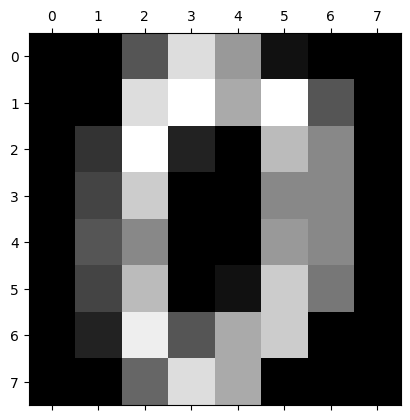

In [12]:
plt.gray()
plt.matshow(digits.images[0])

- `digits.target[0:5]`: Accesses the first 5 elements of the `target` attribute, which are the true labels (digits 0-9) for the images. This returns an array like [0, 1, 2, 3, 4].

In [14]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

- `from sklearn.model_selection import train_test_split`: Imports the `train_test_split` function from scikit-learn. This is used to split the dataset into training and testing parts for model evaluation.

In [15]:
from sklearn.model_selection import train_test_split

- `X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)`: Splits the features (`digits.data`) and labels (`digits.target`) into training and testing sets. `test_size=0.2` means 20% of the data is for testing, 80% for training. The results are stored in four variables: X_train (training features), X_test (testing features), y_train (training labels), y_test (testing labels).

In [18]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

- `len(X_train)`: Uses the built-in `len()` function to get the number of samples in the training features. Output is typically 1437 (80% of 1797 total samples).

In [20]:
len(X_train)

1437

- `len(X_test)`: Gets the number of samples in the testing features. Output is typically 360 (20% of 1797).

In [21]:
len(X_test)

360

- `from sklearn.linear_model import LogisticRegression`: Imports the `LogisticRegression` class from scikit-learn's linear models.
- `model = LogisticRegression(max_iter=1000)`: Creates an instance of the logistic regression model and sets `max_iter=1000` to allow up to 1000 iterations for the solver to converge (helps with training stability).

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

- `model.fit(X_train, y_train)`: Trains (fits) the model using the training features (`X_train`) and labels (`y_train`). This teaches the model to recognize patterns in the data.

In [30]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

After training the model, ALWAYS check the score

- `model.score(X_test, y_test)`: Calculates the accuracy of the model on the testing data (`X_test`, `y_test`). This returns a float between 0 and 1, like 0.96, meaning 96% correct predictions.

In [31]:
model.score(X_test, y_test)

0.9472222222222222

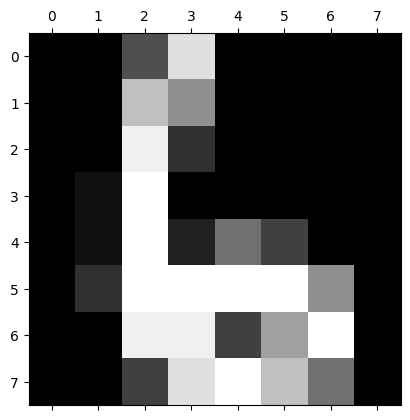

In [33]:
plt.matshow(digits.images[67])

In [35]:
digits.target[67]

np.int64(6)

In [38]:
model.predict([digits.data[67]])

array([6])

In [41]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

- `y_predicted = model.predict(X_test)`: Uses the trained model to predict labels for the testing features (`X_test`). Stores the predictions in `y_predicted`.
- `from sklearn.metrics import confusion_matrix`: Imports the `confusion_matrix` function from scikit-learn's metrics module. This is used to evaluate classification performance.
- `cm = confusion_matrix(y_test, y_predicted)`: Computes a confusion matrix comparing true labels (`y_test`) to predicted labels (`y_predicted`). This is a 10x10 array (for 10 classes: digits 0-9) showing correct and incorrect predictions.

In [42]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  1, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 28,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 40,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  4, 39]])

- `import seaborn as sn`: Imports the seaborn library (for better visualizations) and gives it the shortcut "sn".
- plt.figure(figsize = (10,7))`: Creates a new figure for the plot with a size of 10x7 inches.
- `sn.heatmap(cm, annot=True)`: Uses seaborn's `heatmap` to visualize the confusion matrix (`cm`). `annot=True` adds numbers inside each cell for clarity.
- `plt.xlabel('Predicted')`: Labels the x-axis as "Predicted" (what the model guessed).
- `plt.ylabel('Truth')`: Labels the y-axis as "Truth" (actual labels).

Text(95.72222222222221, 0.5, 'Truth')

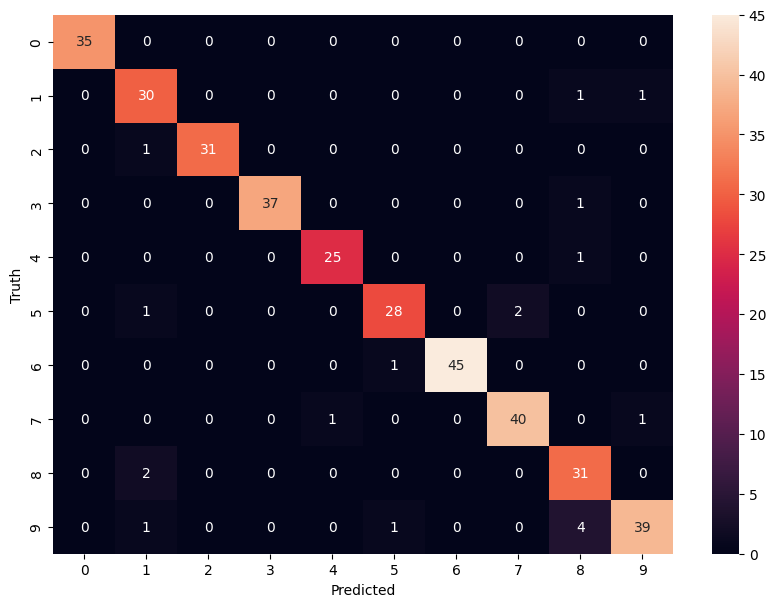

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')